<a href="https://colab.research.google.com/github/lihui1625/machineLearning/blob/main/SK_02_04_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mglearn
import numpy as np
from scipy import sparse
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display
import sklearn
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import mglearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 18.4 MB/s eta 0:00:00


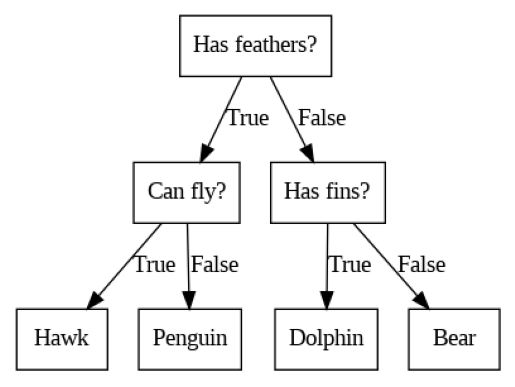

In [ ]:
mglearn.plots.plot_animal_tree()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("train score: ", tree.score(X_train, y_train))
print("test score: ", tree.score(X_test, y_test))

train score:  1.0
test score:  0.9370629370629371


In [ ]:
tree_4 = DecisionTreeClassifier(random_state=0, max_depth=4)
tree_4.fit(X_train, y_train)
print("train score: ", tree_4.score(X_train, y_train))
print("test score: ", tree_4.score(X_test, y_test))

train score:  0.9882629107981221
test score:  0.951048951048951


In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(tree_4, out_file="tree.dot", class_names=["maligant", "benign"], feature_names=cancer.feature_names, impurity=False, filled=True)

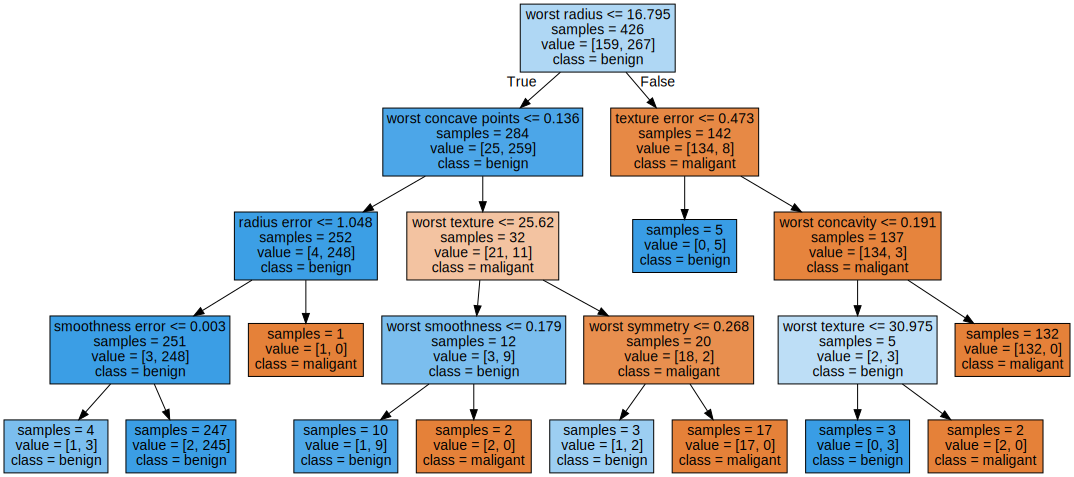

In [ ]:
import graphviz
with open("tree.dot") as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)



In [ ]:
print("Feature importance: ", tree.feature_importances_)

Feature importance:  [0.         0.00752597 0.         0.         0.00903116 0.
 0.00752597 0.         0.         0.         0.00975731 0.04630969
 0.         0.00238745 0.00231135 0.         0.         0.
 0.         0.00668975 0.69546322 0.05383211 0.         0.01354675
 0.         0.         0.01740312 0.11684357 0.01137258 0.        ]


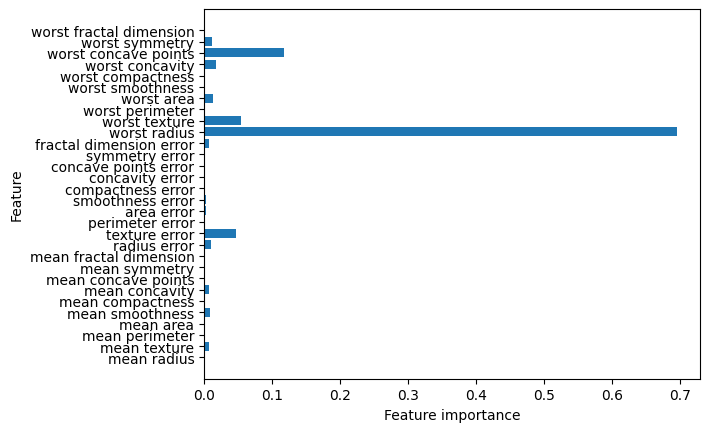

In [ ]:
def plot_feature_importances_cancer(model):
  n_features = cancer.data.shape[1]
  plt.barh(range(n_features), model.feature_importances_, align="center")
  plt.yticks(np.arange(n_features), cancer.feature_names)
  plt.xlabel("Feature importance")
  plt.ylabel("Feature")

plot_feature_importances_cancer(tree)


Feature importances: [0. 1.]


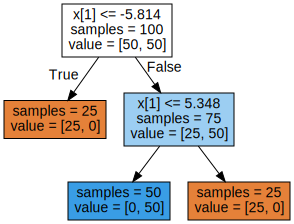

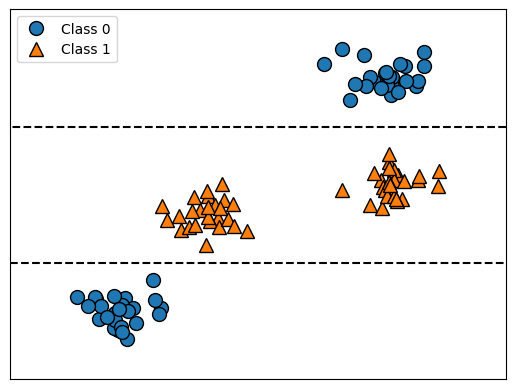

In [ ]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)